In [1]:
import math
import numpy as np
from os import mkdir, rmdir, path
from inspect import getsourcelines
import random
import string
import time
import pandas as pd
import urllib
from pathlib import Path
import zipfile
import scipy
from itertools import permutations

import sklearn.linear_model 
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from scipy.stats.kde import gaussian_kde
import sklearn.decomposition as skldc
from sklearn.preprocessing import scale

from scipy import stats

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns
import sys

sns.set_palette("colorblind")
color_blind_list = sns.color_palette("colorblind", 8)
sns.set(style="whitegrid")

In [123]:
types_ = ["solar panels", "hydroelectricity", "onshore wind", "bioenergy", 
         "geothermal", "Concentrated Solar Power", "offshore wind"]

i = 4
for type_ in types_:
    df_c = pd.read_excel("data_cost_energy/LCOE.xlsx", sheet_name=f"Figure 2.{str(i)}", usecols="J:L", header=1)
    df_c = df_c.rename(columns={'Year.2': 'année', 'Item.2': 'item'})
    df_c["type"] = type_
    df_c = df_c.set_index("année")
    if i > 4:
        df = pd.concat([df, df_c])
    else:
        df = df_c
    i +=1
    

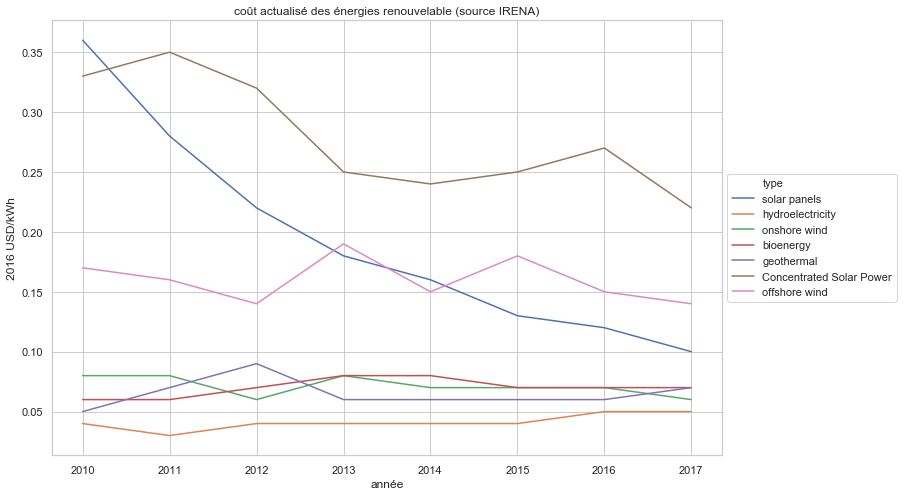

In [128]:
fig, ax = plt.subplots(figsize = (12,8))

data = df[df.item == 'Weighted Average']

sns.lineplot(data=data, x=data.index , y="2016 USD/kWh", hue="type", ax=ax)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("coût actualisé des énergies renouvelable (source IRENA)")
plt.show()
